In [1]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
import main.packages.mine_generic as mine_g
import main.packages.mine_specific as mine_s

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

In [2]:
hicp_all_path = 'data/preprocessed/hicp_yoy.csv'
hicp_class_path = 'data/HICP_COICOP10s.xlsx'
model = 'lasso'
date_range = pd.date_range(start=mine_g.train_test_split_date + pd.DateOffset(months=1), end=mine_g.max_X_date, freq='M')


# 3. Shrinkage method:
## 3.1. Food:


In [3]:
category = 'Food'
cat_short = 'food'
hicp_cat_path = f'data/preprocessed/{cat_short}_yoy_infl.csv'

save_cat_file_path = f'data/forecast_results/{cat_short}_forecast.csv'

HICP_monthly, HICP_class, HICP_cat = mine_g.import_data_all(hicp_all_path=hicp_all_path,
                                                     hicp_class_path=hicp_class_path,
                                                     hicp_cat_path=hicp_cat_path)

cat_df = mine_g.split_into_category(category=category,
                             HICP_class=HICP_class,
                             HICP_monthly=HICP_monthly)
food_cat_prediction = pd.DataFrame(index=date_range)

Number of items in Food group:  180


/Users/lananhnguyen/Desktop/thesis/thesis_code/main/packages/mine_generic.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.fillna(0, inplace=True)


In [4]:
h = 1
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.1, 0.5, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)


Horizon: 1
Training predictor period: 1997-01-31 00:00:00 to 2015-11-30 00:00:00
Training dependent variable period: 1997-02-28 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.4299999999999998}


In [5]:


N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 1)
food_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast


Horizon: 1
------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-11-30 00:00:00
Training period - target : 1997-02-28 00:00:00 to 2015-12-31 00:00:00
Test period - features: DatetimeIndex(['2015-12-31'], dtype='datetime64[ns]', name='date', freq=None)
Test period - target : DatetimeIndex(['2016-01-31'], dtype='datetime64[ns]', name='date', freq=None)
Forecast: [2.34482641]
-------------------------------------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-12-31 00:00:00
Training period - target : 1997-02-28 00:00:00 to 2016-01-31 00:00:00
Test period - features: DatetimeIndex(['2016-01-31'], dtype='datetime64[ns]', name='date', freq=None)
Test period - target : DatetimeIndex(['2016-02-29'], dtype='datetime64[ns]', name='date', freq=None)
Forecast: [2.134105]
-------------------------------------------------------
Training period - features: 1997-01-31 00:00:00 to 2016-01-31 00:00:00
Training period - target : 1997-02-28 00:00:00 to

In [6]:
h = 2
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.4, 0.6, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)


Horizon: 2
Training predictor period: 1997-01-31 00:00:00 to 2015-10-31 00:00:00
Training dependent variable period: 1997-03-31 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.4600000000000001}


In [7]:


N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 1)


food_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast


Horizon: 2
------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-10-31 00:00:00
Training period - target : 1997-03-31 00:00:00 to 2015-12-31 00:00:00
Test period - features: DatetimeIndex(['2015-11-30'], dtype='datetime64[ns]', name='date', freq=None)
Test period - target : DatetimeIndex(['2016-01-31'], dtype='datetime64[ns]', name='date', freq=None)
Forecast: [2.54187423]
-------------------------------------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-11-30 00:00:00
Training period - target : 1997-03-31 00:00:00 to 2016-01-31 00:00:00
Test period - features: DatetimeIndex(['2015-12-31'], dtype='datetime64[ns]', name='date', freq=None)
Test period - target : DatetimeIndex(['2016-02-29'], dtype='datetime64[ns]', name='date', freq=None)
Forecast: [2.45028477]
-------------------------------------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-12-31 00:00:00
Training period - target : 1997-03-31 00:00:00 

In [8]:
h = 3
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.4, 0.6, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)


Horizon: 3
Training predictor period: 1997-01-31 00:00:00 to 2015-09-30 00:00:00
Training dependent variable period: 1997-04-30 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.4800000000000001}


In [9]:


N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 1)
food_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast

# save forecast:
mine_g.save_forecast(forecast_result_df=food_cat_prediction.reset_index(drop=True), cat_file_path=save_cat_file_path, category=cat_short)

Horizon: 3
------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-09-30 00:00:00
Training period - target : 1997-04-30 00:00:00 to 2015-12-31 00:00:00
Test period - features: DatetimeIndex(['2015-10-31'], dtype='datetime64[ns]', name='date', freq=None)
Test period - target : DatetimeIndex(['2016-01-31'], dtype='datetime64[ns]', name='date', freq=None)
Forecast: [2.3710185]
-------------------------------------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-10-31 00:00:00
Training period - target : 1997-04-30 00:00:00 to 2016-01-31 00:00:00
Test period - features: DatetimeIndex(['2015-11-30'], dtype='datetime64[ns]', name='date', freq=None)
Test period - target : DatetimeIndex(['2016-02-29'], dtype='datetime64[ns]', name='date', freq=None)
Forecast: [2.54438327]
-------------------------------------------------------
Training period - features: 1997-01-31 00:00:00 to 2015-11-30 00:00:00
Training period - target : 1997-04-30 00:00:00 t

In [10]:
food_yoy_real = pd.read_csv("data/preprocessed/food_yoy_infl.csv", parse_dates=True, index_col='date')
food_yoy_real_test = food_yoy_real[(food_yoy_real.index > mine_g.train_test_split_date) & (food_yoy_real.index <= mine_g.max_X_date)]
food_compare = pd.concat([food_cat_prediction, food_yoy_real_test], axis = 1)

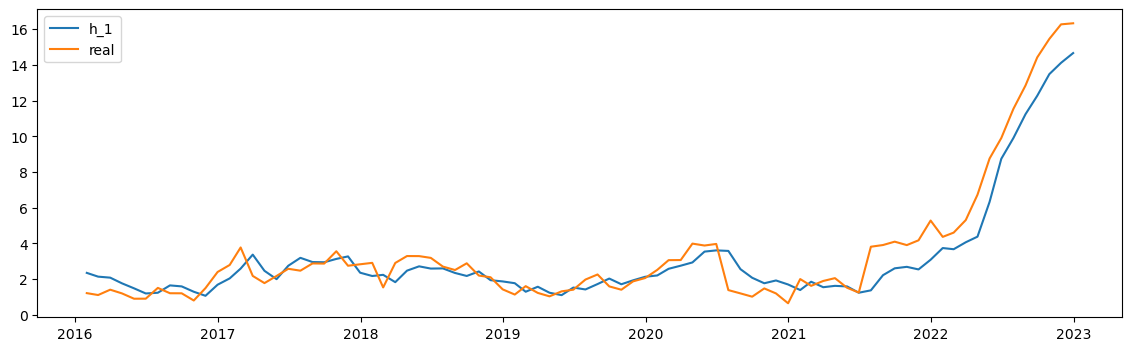

In [11]:
plt.figure(figsize=(14, 4))

plt.plot(food_compare.iloc[:, 0], label = "h_1")
plt.plot(food_compare.iloc[:, 3], label = "real")
plt.legend()
plt.show()

In [12]:
food_compare

,lasso_food_h_1,lasso_food_h_2,lasso_food_h_3,yoy_rate
2016-01-31,2.344826,2.541874,2.371019,1.209677
2016-02-29,2.134105,2.450285,2.544383,1.103310
2016-03-31,2.077339,2.280496,2.340876,1.402806
2016-04-30,1.759770,2.143996,2.315139,1.195219
2016-05-31,1.478941,1.650873,2.270621,0.896414
...,...,...,...,...
2022-08-31,11.240409,11.084316,10.917636,12.849650
2022-09-30,12.271404,11.881780,11.939767,14.423077
2022-10-31,13.485164,12.954497,12.561324,15.458515
2022-11-30,14.118595,14.161682,13.364088,16.275022


In [13]:
mean_absolute_error(food_compare.loc[:, 'yoy_rate'], food_compare.loc[:, 'lasso_food_h_1'])

0.7795979410943662

In [14]:
np.sqrt(mean_squared_error(food_compare.loc[:, 'yoy_rate'], food_compare.loc[:, 'lasso_food_h_1']))

1.00559664182884

---

## 3.2. Energy:


In [15]:
cat_short = 'energy'
category = 'Energy'
hicp_cat_path = f'data/preprocessed/{cat_short}_yoy_infl.csv'
save_cat_file_path = f'data/forecast_results/{cat_short}_forecast.csv'

HICP_monthly, HICP_class, HICP_cat = mine_g.import_data_all(hicp_all_path=hicp_all_path,
                                                     hicp_class_path=hicp_class_path,
                                                     hicp_cat_path=hicp_cat_path)

cat_df = mine_g.split_into_category(category=category,
                             HICP_class=HICP_class,
                             HICP_monthly=HICP_monthly)

energy_cat_prediction = pd.DataFrame(index=date_range)

Number of items in Energy group:  14


/Users/lananhnguyen/Desktop/thesis/thesis_code/main/packages/mine_generic.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.fillna(0, inplace=True)


In [16]:
h = 1
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.01, 0.2, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)


Horizon: 1
Training predictor period: 1997-01-31 00:00:00 to 2015-11-30 00:00:00
Training dependent variable period: 1997-02-28 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.14}


In [17]:

N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
energy_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast


Horizon: 1
------------------------


In [18]:
h = 2
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.1, 0.3, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)


Horizon: 2
Training predictor period: 1997-01-31 00:00:00 to 2015-10-31 00:00:00
Training dependent variable period: 1997-03-31 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.24999999999999994}


In [19]:

N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
energy_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast


Horizon: 2
------------------------


In [20]:
h = 3
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.3, 0.7, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)

Horizon: 3
Training predictor period: 1997-01-31 00:00:00 to 2015-09-30 00:00:00
Training dependent variable period: 1997-04-30 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.5100000000000002}


In [21]:
N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
energy_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast

mine_g.save_forecast(forecast_result_df=energy_cat_prediction.reset_index(drop=True), cat_file_path=save_cat_file_path, category=cat_short)

Horizon: 3
------------------------


In [22]:
yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]
df_compare = pd.concat([energy_cat_prediction, yoy_real_test], axis = 1)

print(mean_absolute_error(df_compare.loc[:, 'yoy_rate'], df_compare.loc[:, f'lasso_{cat_short}_h_1']))
print(np.sqrt(mean_squared_error(df_compare.loc[:, 'yoy_rate'], df_compare.loc[:, f'lasso_{cat_short}_h_1'])))

2.436813543696794
3.7122844232854666


## 3.3. NEIG:

In [23]:
cat_short = 'neig'
category = 'Non-energy industrial goods (NEIG)'
hicp_cat_path = f'data/preprocessed/{cat_short}_yoy_infl.csv'
save_cat_file_path = f'data/forecast_results/{cat_short}_forecast.csv'

HICP_monthly, HICP_class, HICP_cat = mine_g.import_data_all(hicp_all_path=hicp_all_path,
                                                     hicp_class_path=hicp_class_path,
                                                     hicp_cat_path=hicp_cat_path)

cat_df = mine_g.split_into_category(category=category,
                             HICP_class=HICP_class,
                             HICP_monthly=HICP_monthly)
neig_cat_prediction = pd.DataFrame(index=date_range)

Number of items in Non-energy industrial goods (NEIG) group:  302


/Users/lananhnguyen/Desktop/thesis/thesis_code/main/packages/mine_generic.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.fillna(0, inplace=True)


In [24]:
h = 1
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.01, 0.3, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)

Horizon: 1
Training predictor period: 1997-01-31 00:00:00 to 2015-11-30 00:00:00
Training dependent variable period: 1997-02-28 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.26}


In [25]:
N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
neig_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast


Horizon: 1
------------------------


In [26]:
h = 2
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.05, 0.4, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)

Horizon: 2
Training predictor period: 1997-01-31 00:00:00 to 2015-10-31 00:00:00
Training dependent variable period: 1997-03-31 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.25000000000000006}


In [27]:
N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
neig_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast

Horizon: 2
------------------------


In [28]:
h = 3
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.05, 0.4, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)

Horizon: 3
Training predictor period: 1997-01-31 00:00:00 to 2015-09-30 00:00:00
Training dependent variable period: 1997-04-30 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.22000000000000003}


In [29]:
N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
neig_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast

# save forecast:
mine_g.save_forecast(forecast_result_df=neig_cat_prediction.reset_index(drop=True), cat_file_path=save_cat_file_path, category=cat_short)

Horizon: 3
------------------------


In [30]:
yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]
df_compare = pd.concat([neig_cat_prediction, yoy_real_test], axis = 1)

print(mean_absolute_error(df_compare.loc[:, 'yoy_rate'], df_compare.loc[:, f'lasso_{cat_short}_h_1']))
print(np.sqrt(mean_squared_error(df_compare.loc[:, 'yoy_rate'], df_compare.loc[:, f'lasso_{cat_short}_h_1'])))

0.6108203877651717
0.8735308143451194


## 3.4. Services:

In [31]:
cat_short = 'services'
category = 'Services'
hicp_cat_path = f'data/preprocessed/{cat_short}_yoy_infl.csv'
save_cat_file_path = f'data/forecast_results/{cat_short}_forecast.csv'

HICP_monthly, HICP_class, HICP_cat = mine_g.import_data_all(hicp_all_path=hicp_all_path,
                                                     hicp_class_path=hicp_class_path,
                                                     hicp_cat_path=hicp_cat_path)

cat_df = mine_g.split_into_category(category=category,
                             HICP_class=HICP_class,
                             HICP_monthly=HICP_monthly)
services_cat_prediction = pd.DataFrame(index=date_range)

Number of items in Services group:  148


/Users/lananhnguyen/Desktop/thesis/thesis_code/main/packages/mine_generic.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.fillna(0, inplace=True)


In [32]:
h = 1
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.01, 0.3, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)

Horizon: 1
Training predictor period: 1997-01-31 00:00:00 to 2015-11-30 00:00:00
Training dependent variable period: 1997-02-28 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.11}


In [33]:
N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
services_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast

Horizon: 1
------------------------


In [34]:
h = 2
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.01, 1, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)

Horizon: 2
Training predictor period: 1997-01-31 00:00:00 to 2015-10-31 00:00:00
Training dependent variable period: 1997-03-31 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.03}


In [35]:
N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
services_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast

Horizon: 2
------------------------


In [36]:
h = 3
X_cat_train, X_cat_test, y_cat_train, y_cat_test = mine_g.split_train_test_set(X = cat_df, y = HICP_cat, h = h)

best_param = mine_s.tuning_gridsearchcv(reg= Lasso(),
                                grid_space= np.arange(0.01, 1, 0.01),
                                X_train= X_cat_train.copy(),
                                y_train= y_cat_train.copy(),
                                test_size=24)
print(best_param)

Horizon: 3
Training predictor period: 1997-01-31 00:00:00 to 2015-09-30 00:00:00
Training dependent variable period: 1997-04-30 00:00:00 to 2015-12-31 00:00:00
{'regression__alpha': 0.06}


In [37]:
N, T = len(X_cat_train), len(X_cat_test)
forecast = mine_g.generate_forecast(X=cat_df, y=HICP_cat, N=N, T=T, h=h, hyperparam=best_param['regression__alpha'], model=Lasso, verbose = 0)
services_cat_prediction.loc[:, f'{model}_{cat_short}_h_{h}'] = forecast


# save forecast:
mine_g.save_forecast(forecast_result_df=services_cat_prediction.reset_index(drop=True), cat_file_path=save_cat_file_path, category=cat_short)

Horizon: 3
------------------------


In [38]:
yoy_real = pd.read_csv(f"data/preprocessed/{cat_short}_yoy_infl.csv", parse_dates=True, index_col='date')
yoy_real_test = yoy_real[(yoy_real.index > mine_g.train_test_split_date) & (yoy_real.index <= mine_g.max_X_date)]
df_compare = pd.concat([services_cat_prediction, yoy_real_test], axis = 1)

print(mean_absolute_error(df_compare.loc[:, 'yoy_rate'], df_compare.loc[:, f'lasso_{cat_short}_h_1']))
print(np.sqrt(mean_squared_error(df_compare.loc[:, 'yoy_rate'], df_compare.loc[:, f'lasso_{cat_short}_h_1'])))

0.5337639352657108
0.6761874741453127
